In [0]:
# !kill -9 -1

In [0]:
!wget http://chaladze.com/l5/img/Linnaeus%205%20256X256.rar

In [0]:
!apt-get install -y unrar

In [0]:
ls

In [0]:
!unrar x Linnaeus\ 5\ 256X256.rar -idq

In [0]:
!mv Linnaeus\ 5\ 256X256 data

In [0]:
ls data/

In [0]:
import tensorflow as tf
import keras.backend as K
from keras.preprocessing.image import ImageDataGenerator

In [0]:
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten,Input
from keras.models import Sequential, Model
from keras.applications.mobilenet import MobileNet

def get_model(num_classes, image_size):
  
    image_input = Input(shape=(image_size, image_size, 3))

    model = MobileNet(input_tensor=image_input, include_top=False, weights='imagenet')
    #model.summary()

    last_layer = model.layers[-1].output
    
    x= Flatten(name='flatten')(last_layer)
    x = Dense(128, activation='relu', name='fc1')(x)
    x = Dense(128, activation='relu', name='fc2')(x)
    out = Dense(num_classes, activation='softmax', name='output')(x)

    transfer_model = Model(image_input, out)

    for layer in transfer_model.layers[:-3]:
        layer.trainable = False
    
    #transfer_model.summary()
    
    transfer_model.compile(optimizer = 'adam', loss='categorical_crossentropy', metrics=['accuracy'])   

    return transfer_model  

In [0]:
num_classes = 5
batch_size = 64
image_size = 224
num_epochs = 100

In [29]:
# train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2,
#                                    horizontal_flip=True, validation_split=0.2)

train_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.33)

train_generator = train_datagen.flow_from_directory('data/train', 
                                                    target_size=(image_size, image_size),
                                                    batch_size = batch_size, 
                                                    class_mode='categorical',
                                                    subset='training')

valid_generator = train_datagen.flow_from_directory('data/train', 
                                                    target_size=(image_size, image_size),
                                                    batch_size = batch_size, 
                                                    class_mode='categorical',
                                                    subset='validation')

model = get_model(num_classes, image_size)

checkpoint =  tf.keras.callbacks.ModelCheckpoint('weights.h5', monitor='val_acc',
                                                    mode='max', save_weights_only=True,
                                                    save_best_only=True, verbose=1)

history = model.fit_generator(train_generator,
                              steps_per_epoch=train_generator.samples//batch_size,
                              epochs=num_epochs, callbacks=[checkpoint],
                              validation_data=valid_generator,
                              validation_steps=valid_generator.samples//batch_size)


Found 4020 images belonging to 5 classes.
Found 1980 images belonging to 5 classes.


/usr/local/lib/python3.6/dist-packages/keras/applications/mobilenet.py:224: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


17227776/17225924 [==============================] - 2s 0us/step
Epoch 1/100
62/62 [==============================] - 115s 2s/step - loss: 4.0589 - acc: 0.6768 - val_loss: 3.5743 - val_acc: 0.7391

Epoch 00001: val_acc improved from -inf to 0.73906, saving model to weights.h5
Epoch 2/100
62/62 [==============================] - 22s 356ms/step - loss: 3.3096 - acc: 0.7827 - val_loss: 3.6523 - val_acc: 0.7318

Epoch 00002: val_acc did not improve from 0.73906
Epoch 3/100
62/62 [==============================] - 22s 356ms/step - loss: 3.2851 - acc: 0.7886 - val_loss: 3.8408 - val_acc: 0.7036

Epoch 00003: val_acc did not improve from 0.73906
Epoch 4/100
62/62 [==============================] - 22s 357ms/step - loss: 3.2514 - acc: 0.7913 - val_loss: 3.6840 - val_acc: 0.7318

Epoch 00004: val_acc did not improve from 0.73906
Epoch 5/100
62/62 [==============================] - 22s 356ms/step - loss: 3.2020 - acc: 0.7992 - val_loss: 3.5257 - val_acc: 0.7510

Epoch 00005: val_acc improved fro

In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

training_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['acc']
val_acc = history.history['val_acc']

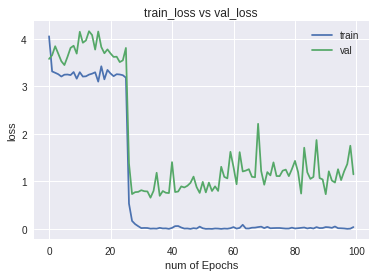

In [31]:
plt.plot(training_loss)
plt.plot(val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])

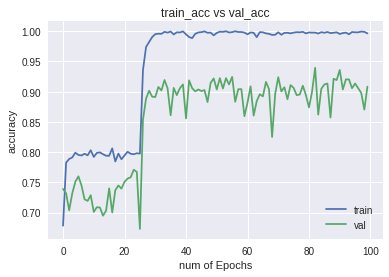

In [32]:
plt.plot(train_acc)
plt.plot(val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)

In [33]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('data/test', 
                                                    target_size=(image_size, image_size),
                                                    batch_size = batch_size, 
                                                    class_mode='categorical')

Found 2000 images belonging to 5 classes.


In [34]:
model = get_model(num_classes, image_size)
model.load_weights('weights.h5')

/usr/local/lib/python3.6/dist-packages/keras/applications/mobilenet.py:224: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


In [35]:
evaluate = model.evaluate_generator(test_generator)

print('Test \n loss:{} \n accuracy:{}'.format(evaluate[0], evaluate[1]))

Test 
 loss:0.7988834643363953 
 accuracy:0.9345
